In [113]:
import torch
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.datasets import make_circles

In [155]:
n_samples=1000
x,y=make_circles(n_samples,noise=0.035
                 ,random_state=42)

In [156]:
len(x),len(y)

(1000, 1000)

In [157]:
x[:5]

array([[ 0.75123641,  0.23528199],
       [-0.75062724,  0.15711707],
       [-0.81900863,  0.18545127],
       [-0.40258194,  0.68771962],
       [ 0.44305629, -0.89627646]])

In [158]:
y[:5]

array([1, 1, 1, 1, 0])

In [159]:
circles=pd.DataFrame({'X1':x[:,0],
                      'X2':x[:,1],
                      'labels':y})

In [160]:
circles

,X1,X2,labels
0,0.751236,0.235282,1
1,-0.750627,0.157117,1
2,-0.819009,0.185451,1
3,-0.402582,0.687720,1
4,0.443056,-0.896276,0
...,...,...,...
995,0.245313,0.939541,0
996,-0.980334,-0.276320,0
997,-0.134733,-0.814042,1
998,0.667997,-0.773924,0


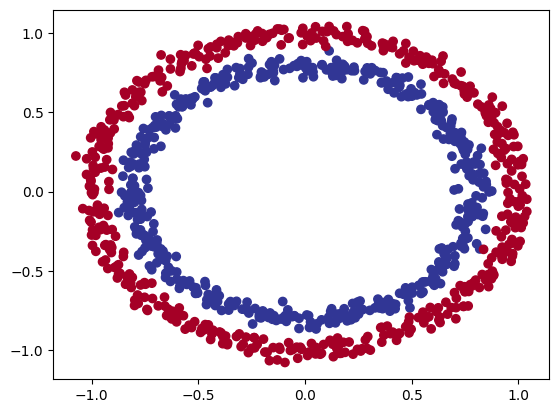

In [161]:
plt.scatter(x=x[:,0],y=x[:,1],c=y,cmap=plt.cm.RdYlBu);

In [162]:
 x.shape,y.shape

((1000, 2), (1000,))

In [163]:
X=torch.from_numpy(x).type(torch.float)
Y=torch.from_numpy(y).type(torch.float)

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=69)

In [165]:
from torch import nn

In [166]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer=nn.Sequential(
        nn.Linear(in_features=2,out_features=15),
        nn.ReLU(),
        nn.Linear(in_features=15,out_features=1)
    )
  def forward(self,x):
    return self.layer(x)
model=CircleModel()
model

CircleModel(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=1, bias=True)
  )
)

In [169]:
lossf=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [170]:
from sklearn import metrics
torch.manual_seed(420)
epochs=1000
for epoch in range(epochs):
  model.train()
  y_logits=model(X_train)
  y_preds=torch.round(torch.sigmoid(y_logits))

  loss=lossf(y_logits.squeeze(),Y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits=model(X_test)
    test_preds=torch.round(torch.sigmoid(test_logits))

    test_loss=lossf(test_logits.squeeze(),Y_test)
    acc=metrics.accuracy_score(Y_train.numpy(),y_preds.numpy())
    test_acc=metrics.accuracy_score(Y_test.numpy(),test_preds.numpy())

  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.5f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.5f}%")

Epoch: 0 | Loss: 0.61183, Accuracy: 0.84933% | Test loss: 0.61924, Test acc: 0.81200%
Epoch: 100 | Loss: 0.59247, Accuracy: 0.91467% | Test loss: 0.60094, Test acc: 0.91200%
Epoch: 200 | Loss: 0.57086, Accuracy: 0.94267% | Test loss: 0.57931, Test acc: 0.93600%
Epoch: 300 | Loss: 0.54680, Accuracy: 0.95600% | Test loss: 0.55505, Test acc: 0.95200%
Epoch: 400 | Loss: 0.52060, Accuracy: 0.96267% | Test loss: 0.52801, Test acc: 0.97600%
Epoch: 500 | Loss: 0.49252, Accuracy: 0.96533% | Test loss: 0.49880, Test acc: 0.97600%
Epoch: 600 | Loss: 0.46278, Accuracy: 0.96800% | Test loss: 0.46797, Test acc: 0.98400%
Epoch: 700 | Loss: 0.43181, Accuracy: 0.97467% | Test loss: 0.43623, Test acc: 0.98800%
Epoch: 800 | Loss: 0.40065, Accuracy: 0.98133% | Test loss: 0.40420, Test acc: 0.99600%
Epoch: 900 | Loss: 0.36998, Accuracy: 0.98667% | Test loss: 0.37258, Test acc: 0.99600%


In [173]:
model.state_dict()

OrderedDict([('layer.0.weight',
              tensor([[ 0.2561, -0.5714],
                      [ 2.6793, -0.4880],
                      [-0.6341, -1.0084],
                      [ 0.5310,  0.2573],
                      [-0.3200, -0.4992],
                      [-0.9642, -0.2744],
                      [-0.9165,  2.3982],
                      [-0.8159, -1.0893],
                      [-0.9756, -2.4890],
                      [-0.6054, -0.6466],
                      [ 0.1498,  0.5643],
                      [ 1.1897, -1.1581],
                      [ 0.0288, -0.5492],
                      [-1.8251, -0.6814],
                      [-0.7471,  0.1597]])),
             ('layer.0.bias',
              tensor([ 1.2338, -0.1106,  0.0204, -0.6298, -0.6147, -0.1986,  0.0553, -0.0254,
                      -0.4463,  1.7820, -0.6174, -0.1345,  1.2464, -0.1573, -0.1908])),
             ('layer.2.weight',
              tensor([[ 1.1157, -2.5919, -0.9896,  0.0829,  0.2039, -0.9334, -2.5007, -1.17

In [172]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="basic_binary_classification_model.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)
print("Model saved")

Model saved
